# Plotting with pandas

We have learned how to manipulate datasets in relatively sophisticated ways using pandas. This week we will learn the basics of data visualization with pandas. After we compute some quantities of interest for our data, how can we communicate those quantities visually? By plotting data, we can more quickly discover patterns in it and more easily communicate our findings to others.

We'll use the "auto-mpg.csv" data file for this notebook, so please download it from LATTE.

## Histograms

One simple sort of plot is a *histogram*, which displays the frequencies or counts of different discrete values. Given a pandas Series (e.g., DataFrame column), we can easily produce a histogram as follows:

<AxesSubplot:ylabel='Frequency'>

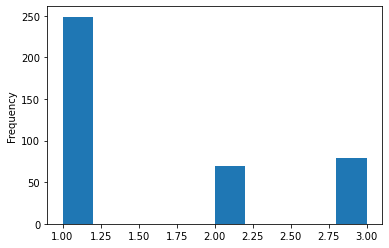

In [1]:
import pandas as pd
auto = pd.read_csv("auto-mpg.csv")
auto["origin"].plot.hist()

The $x$-axis has the possible values that appear, and the height of each bar indicates the number of times that value appeared. So for origin 1 (North America), there are several times as many cars in this dataset as for the other two origins (Europe and Asia).

This kind of plot works whether or not the possible values on the $x$-axis are numerical or non-numerical (e.g., strings). If the values that appear are numerical, then the possible values will be grouped into intervals. For example:

<AxesSubplot:ylabel='Frequency'>

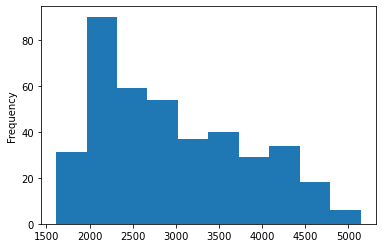

In [2]:
auto["weight"].plot.hist()

Each of the bars here represents the number of times a value in the corresponding interval on the $x$-axis appeared in the `"weight"` column.

## Bar charts

Histograms allow us to visualize the frequency of occurence of each value from a set of possible values. However, we often want a chart that looks similar to a histogram, but displays a value different from frequency on the $y$-axis. Specifically, if we have *discrete* categories (such as the origin of manufacture in our automobile dataset) and we want to visualize a continuous quantity for each category, we can use a *bar chart*. For example, we can plot the average MPG value for the autos from each origin of manufacture in our dataset, as follows.

<AxesSubplot:xlabel='origin'>

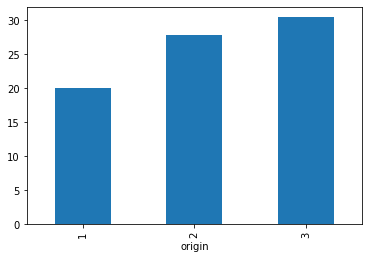

In [3]:
# first, compute the average MPG for each origin of manufacture
avg_mpg = auto.groupby("origin")["mpg"].mean()
# now, plot it as a bar chart
avg_mpg.plot.bar()

So we can see that North American autos have the lowest MPG, followed by Europe, and Asian autos have the highest fuel efficiency.

In the above example, we compute a pandas Series (a single column, rather than an entire DataFrame). If we have a DataFrame and want to plot one column on the $x$-axis and another on the $y$-axis, we can specify those columns explicitly by passing them as arguments to the plotting method.

   origin        mpg
0       1  20.083534
1       2  27.891429
2       3  30.450633


<AxesSubplot:xlabel='origin'>

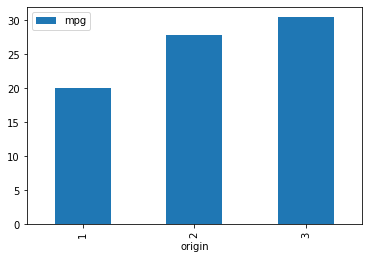

In [4]:
# compute average MPG for each origin as before
# this time, we produce a DataFrame with two columns, "origin" and "mpg"
avg_mpg = auto.groupby("origin")[["mpg"]].mean().reset_index()
print(avg_mpg)
# now we can produce substantially the same plot by specifying the columns we want to plot
avg_mpg.plot.bar(x="origin", y="mpg")

There is a small difference in the plots we produce: when we call the plot method on a DataFrame rather than a series, we get a legend that tells us what is being plotted (in this case, mpg). We can customize this text using the `label` keyword argument:

<AxesSubplot:xlabel='origin'>

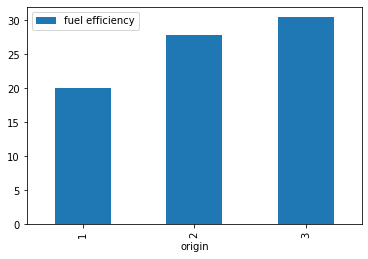

In [5]:
avg_mpg.plot.bar(x="origin", y="mpg", label="fuel efficiency")

## Line charts

Bar charts are useful when we have discrete categories we want to plot on the $x$-axis. If the values we want to plot on the $x$- and $y$-axes are both continuous, then a line chart might be more appropriate. Line charts are used to plot two continuous quantities, where the quantity plotted on the $y$-axis is completely determined by (i.e., is a function of) the quantity plotted on the $x$-axis. For example, if we plot a time series, where at every point in time there is exactly one value we wish to represent in our figure, then a line chart is an appropriate kind of plot. We will demonstrate this sort of plot by showing the average MPG in each year of our dataset.

<AxesSubplot:xlabel='year'>

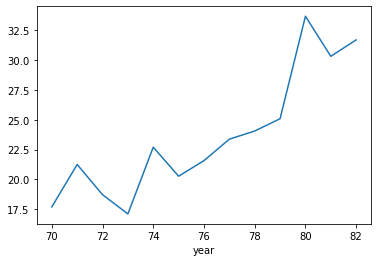

In [6]:
# as before, we first compute the average MPG for each year
avg_mpg = auto.groupby("year")["mpg"].mean()
# now, plot it as a line chart
avg_mpg.plot.line()

## Scatter plots

Sometimes we want to visualize two (or more) continuous quantities, none of which is completely determined by the others. For example, we might want to visualize the relationship between weight and fuel efficiency. Neither of these continuous quantities determines the other, so a line chart is not appropriate. But we can produce a scatter plot that simply displays all combinations of these two quantities that appear in the dataset, with each row appearing as a different point in the plot.

<AxesSubplot:xlabel='weight', ylabel='mpg'>

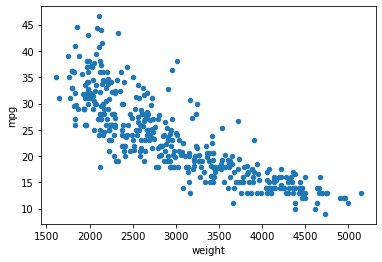

In [7]:
auto.plot.scatter(x='weight', y='mpg')

There is a clear relationship between weight and fuel efficiency that we can see from the plot: higher weights generally mean lower fuel efficiencies, as one might expect. But of course neither quantity completely determines the other.

If we want to visualize relationships between three continuous quantities at the same time, we can add color to our scatter plot. For example, we might want to also see how the displacement of the engine interacts with both the weight and fuel efficiency of the cars in our dataset. We can do so by specifying that the displacement should encode the color of each data point as follows:

<AxesSubplot:xlabel='weight', ylabel='mpg'>

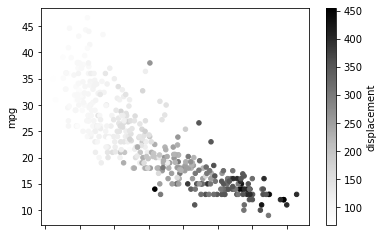

In [8]:
auto.plot.scatter(x='weight', y='mpg', c='displacement') # c argument is a column that encodes the color

This lets us see that displacement generally increases with weight (or decreases as fuel efficiency increases).

By default, pandas chooses a gray scale to represent the range of possible values of the `'displacement'` column. If we want a different color scheme, the simplest method is to specify a "color map". Behind the scenes, `pandas` relies on the `matplotlib` plotting library to do all its plotting, and `matplotlib` provides many different possible color maps. You can [read about them here](https://matplotlib.org/stable/tutorials/colors/colormaps.html) (if you scroll down in that page, you will find a list of built-in colormaps). For example, we could use the "plasma" color map instead of the boring grayscale by passing an additional `cmap` argument:

<AxesSubplot:xlabel='weight', ylabel='mpg'>

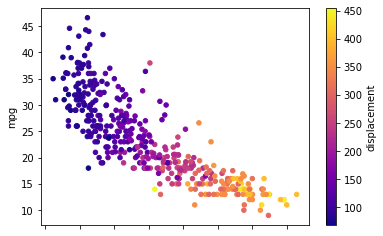

In [9]:
auto.plot.scatter(x='weight', y='mpg', c='displacement', cmap='plasma') # additionally, specify how to turn displacements into colors

## Multiple plots on the same axes

Sometimes it's helpful to plot multiple figures on the same axes. For example, we might want to produce our time series of auto fuel efficiency separately for each region of origin. I.e., we might wish to view separate time series for North America, Europe, and Asia, but plotted on the same axes so that the scale can be more easily compared. One way to do this is group by origin, and then separately produce the same figure for each origin. Pandas magically puts everything on the same axes for us:

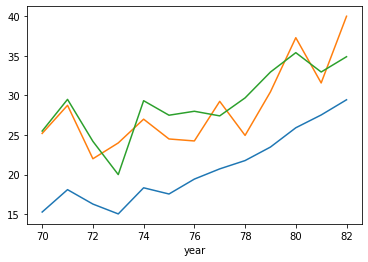

In [10]:
by_origin = auto.groupby("origin")

for origin_name, origin_data in by_origin:
    avg_mpg = origin_data.groupby("year")["mpg"].mean()
    avg_mpg.plot.line(label=origin_name)

This plot is somewhat unsatisfactory in that we can't see which line corresponds to which origin. It would be better to have a legend to go with it. We demonstrate one way to accomplish this task. As is often the case for sophisticated plotting tasks, customizing our plot in this way requires us to directly access the lower-level `matplotlib` plotting library that pandas uses for its plotting. We will do the following:

1. Explicitly construct a set of axes to use for our plot, using matplotlib
2. Group our data by origin
3. For each origin, plot our data as before, but now explicitly specify the set of axes to use and how to label each line

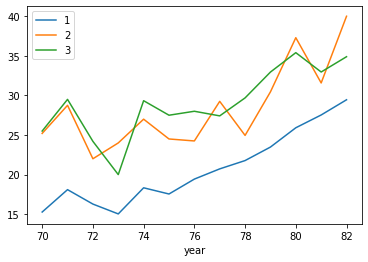

In [11]:
import matplotlib.pyplot as plt # this is the low-level plotting library that pandas uses behind the scenes
fig, ax = plt.subplots() # ax is our "axes" object; it represents a common set of axes to plot on

by_origin = auto.groupby("origin") # as before

for origin_name, origin_data in by_origin: # as before
    avg_mpg = origin_data.groupby("year")[["mpg"]].mean() # this time we get a DataFrame instead of a series
    avg_mpg.plot.line(y='mpg', label=origin_name, ax=ax) # specify both the label for this line, and the axes to plot on

This is a bit cumbersome. The `DataFrame` plotting methods let us specify the label for each line in the legend (as opposed to the `Series` plotting methods, which are mostly the same but for some reason seem to omit this functionality). But for some reason, the `DataFrame` plotting methods are not as good at guessing when we would like to re-use axes, so we have to explicitly tell it to re-use the same axes.

## Further customization

It's possible to customize your plots in many ways. You can label the axes, add titles, add ticks or gridlines, change colors, etc. You can take a look at the [pandas documentation for plotting here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html), though for some features you will need to interact directly with `matplotlib`, which has its own documentation. At that point, its often easiest to just do a Google search for whatever plotting question you have. (Or feel free to ask me in office hours.)

We mention one additional customization here, mostly relevant for scatter plots. In addition to changing the color of points, its possible to specify the shape of the marker used to indicate points (instead of the default circle). A [list of the possible shapes is available here](https://matplotlib.org/stable/api/markers_api.html). We specify the marker shape by passing a `marker` keyword argument to the plot function.

For example, in the scatter plot we produced which displayed above, we might want to use different shapes to indicate different cylinder counts in the autos. We demonstrate this, along with some other plotting features, below:

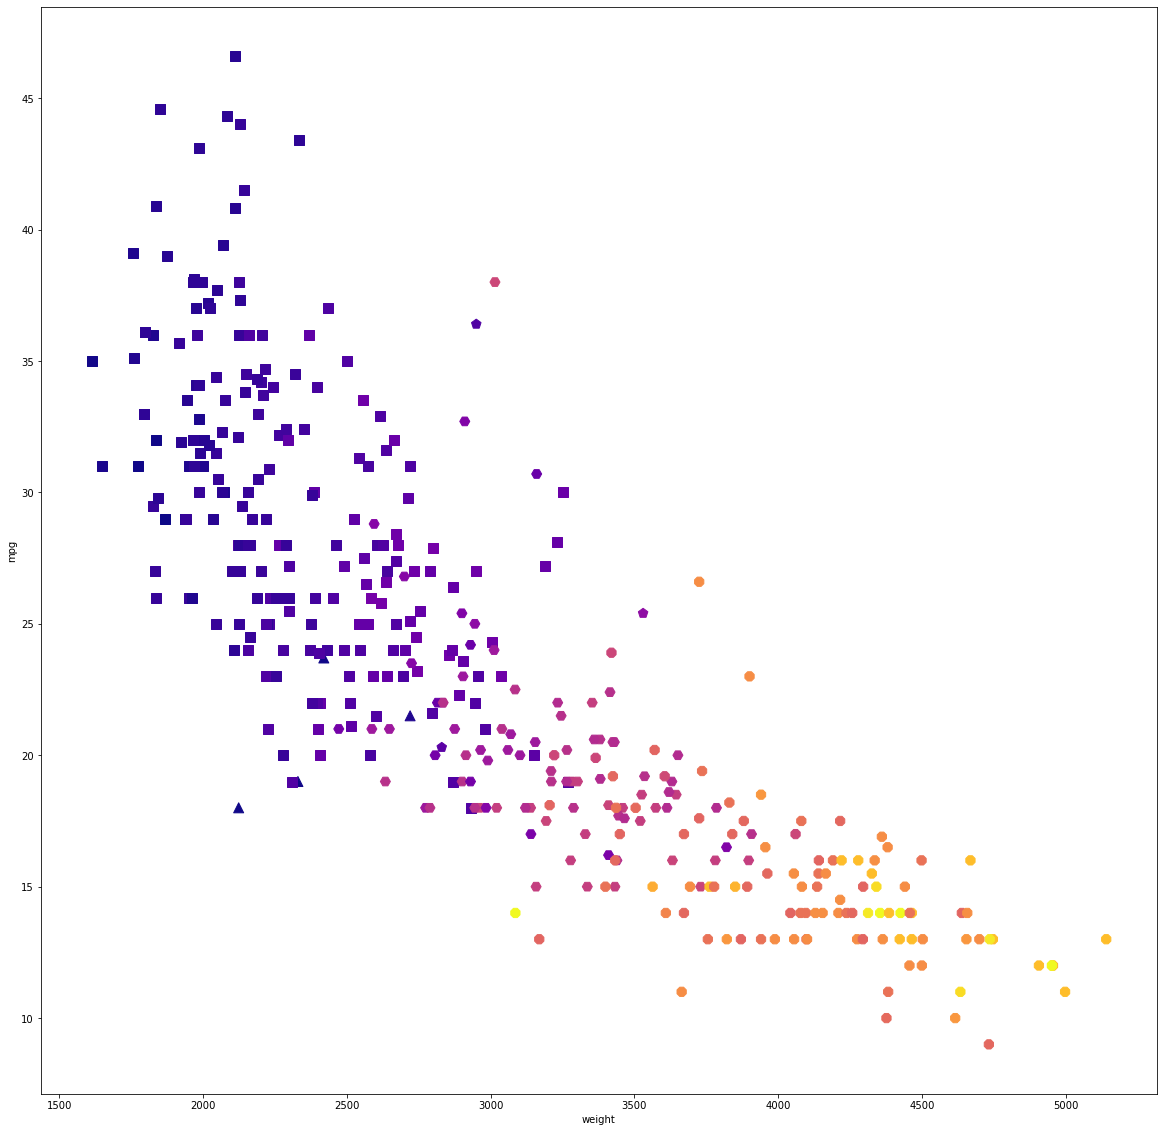

In [12]:
fig, ax = plt.subplots() # we again need this lower-level matplotlib feature

# dictionary mapping cylinder counts to markers used to display them
# see the list of possible shapes linked above for documentation of the shape abbreviations
cylinder_markers = {3: "^", # triangle
                    4: "s", # square
                    5: "p", # pentagon
                    6: "H", # hexagon
                    8: "8"} # octagon

# compute the maximum and minimum displacement values of the whole dataset,
# so we can use a consistent scale for our colors even after we restrict to the subset with a particular cylinder count
vmax = auto["displacement"].max()
vmin = auto["displacement"].min()

by_cylinder = auto.groupby("cylinders") # group by cylinder


for num_cylinders, cylinder_data in by_cylinder:
    # we will separately produce the same scatter plot, with a different marker, for each cylinder count
    marker = cylinder_markers[num_cylinders] # look up the marker we should use for this cylinder count
    cylinder_data.plot.scatter(x='weight', y='mpg', c='displacement', cmap='plasma', # as before
                               vmin=vmin, vmax=vmax, # the scale (maximum and minimum values) to use for the colors
                               colorbar=False, # turn off the bar labeleing the color scale
                               marker=marker, # the marker shape
                               figsize=(20,20), # enlarge the figure
                               s=100, # enlarge the markers
                               ax=ax) # re-use the same axes

This is a fairly complicated example (though `matplotlib` can get a lot more complicated than this!) but it illustrates the potential power of these plotting tools. Feel free to search for or ask about any functionality your curious about. But mastering all of these features is not essential for this course.